In [60]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.models import Model,Sequential
from keras.optimizers import RMSprop
from tensorflow.math import l2_normalize
from keras.utils import plot_model

In [33]:
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=5000) 

In [34]:
word_idx=imdb.get_word_index() #getting vocab from imdb data

In [35]:
idx_word=dict([(value,key) for (key,value) in word_idx.items()])
actual_review=[idx_word.get(idx-3,'#') for idx in xtrain[0]] #if key is not present # will be used
actual_review=' '.join(actual_review)
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly # was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little # that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big # for the whole film but these children are amazing and should be # for what they have done don't you think the whole story was

In [36]:
maxlen=500
xtrain=pad_sequences(xtrain,maxlen=maxlen,padding='post')
xtest=pad_sequences(xtest,maxlen=maxlen,padding='post')

In [37]:
xtrain=np.asarray(xtrain).astype('float32')
xtest=np.asarray(xtest).astype('float32')
ytrain=np.asarray(ytrain).astype('float32')
ytest=np.asarray(ytest).astype('float32')
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(25000, 500) (25000, 500)
(25000,) (25000,)


# Model Architecture

In [40]:
inputs = Input(shape=(maxlen,))
embedding = Embedding(5000, 32,trainable=True)(inputs)
#channel 1
x = Conv1D(filters=128, kernel_size=3*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
a=LSTM(128)(x)

# channel 2
x = Conv1D(filters=128, kernel_size=5*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
b=LSTM(128)(x)

# channel 3
x = Conv1D(filters=128, kernel_size=7*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
c=LSTM(128)(x)

# channel 4
x = Conv1D(filters=128, kernel_size=9*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
d=LSTM(128)(x)

merged=concatenate([a,b,c,d])
dense=Dense(100, activation='relu')(merged)
drop=Dropout(0.2)(dense)
outputs = Dense(1, activation='sigmoid')(merged)
#model
model = Model(inputs=inputs, outputs=outputs)
# compile
opt=RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 500, 32)      160000      input_13[0][0]                   
__________________________________________________________________________________________________
conv1d_35 (Conv1D)              (None, 405, 128)     393344      embedding_12[0][0]               
__________________________________________________________________________________________________
conv1d_36 (Conv1D)              (None, 341, 128)     655488      embedding_12[0][0]               
______________________________________________________________________________________

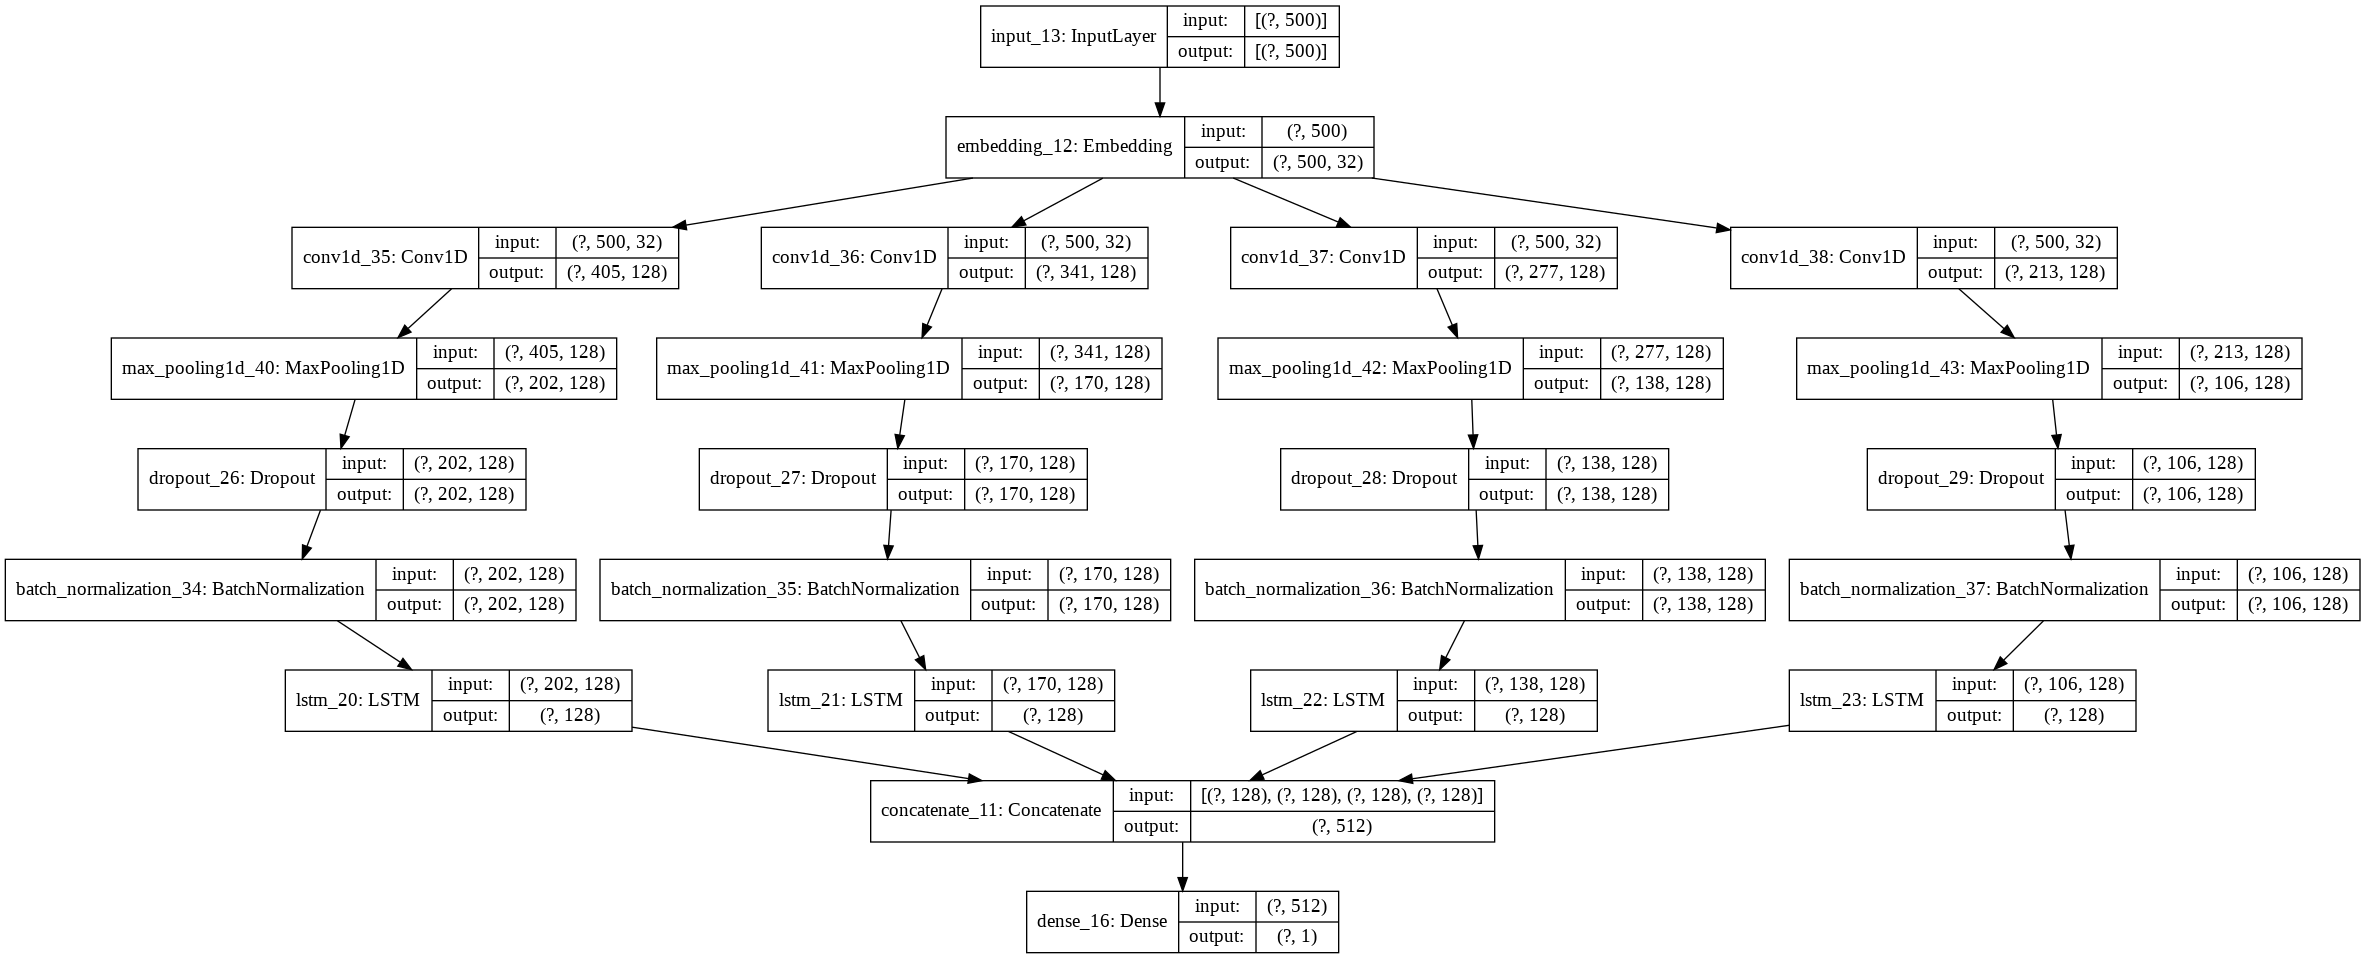

In [61]:
plot_model(model, show_shapes=True, to_file='drive/My Drive/Colab_files/baseline_1.png')

# Model Training

In [41]:
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=2,validation_data=(xtest,ytest),validation_batch_size=32)

Epoch 1/2
782/782 [==============================] - 106s 135ms/step - loss: 0.5378 - accuracy: 0.7116 - val_loss: 1.0120 - val_accuracy: 0.5664
Epoch 2/2
782/782 [==============================] - 105s 134ms/step - loss: 0.3219 - accuracy: 0.8692 - val_loss: 0.3841 - val_accuracy: 0.8528


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
opt=RMSprop(learning_rate=0.001,decay=0.1)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=2,validation_data=(xtest,ytest),validation_batch_size=32)

Epoch 1/2
782/782 [==============================] - 106s 135ms/step - loss: 0.2411 - accuracy: 0.9075 - val_loss: 0.3040 - val_accuracy: 0.8770
Epoch 2/2
782/782 [==============================] - 104s 133ms/step - loss: 0.2411 - accuracy: 0.9078 - val_loss: 0.3045 - val_accuracy: 0.8765


In [49]:
opt=RMSprop(learning_rate=0.001,decay=0.1)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=2,validation_data=(xtest,ytest),validation_batch_size=32)

Epoch 1/2
782/782 [==============================] - 105s 135ms/step - loss: 0.2395 - accuracy: 0.9089 - val_loss: 0.3020 - val_accuracy: 0.8785
Epoch 2/2
782/782 [==============================] - 104s 133ms/step - loss: 0.2381 - accuracy: 0.9082 - val_loss: 0.3024 - val_accuracy: 0.8784


In [50]:
model.save_weights('drive/My Drive/Colab_files/baseline_1.h5')

In [51]:
opt=RMSprop(learning_rate=0.001,decay=0.1)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=2,validation_data=(xtest,ytest),validation_batch_size=32)

Epoch 1/2
782/782 [==============================] - 106s 135ms/step - loss: 0.2373 - accuracy: 0.9086 - val_loss: 0.3005 - val_accuracy: 0.8782
Epoch 2/2
782/782 [==============================] - 104s 133ms/step - loss: 0.2385 - accuracy: 0.9080 - val_loss: 0.3000 - val_accuracy: 0.8786


In [52]:
model.save_weights('drive/My Drive/Colab_files/baseline_1.h5')

In [53]:
opt=RMSprop(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=3,validation_data=(xtest,ytest),validation_batch_size=32)

Epoch 1/3
782/782 [==============================] - 106s 135ms/step - loss: 0.2356 - accuracy: 0.9116 - val_loss: 0.2954 - val_accuracy: 0.8820
Epoch 2/3
782/782 [==============================] - 104s 134ms/step - loss: 0.2292 - accuracy: 0.9136 - val_loss: 0.2918 - val_accuracy: 0.8827
Epoch 3/3
782/782 [==============================] - 105s 134ms/step - loss: 0.2216 - accuracy: 0.9171 - val_loss: 0.2923 - val_accuracy: 0.8829


In [54]:
model.save_weights('drive/My Drive/Colab_files/baseline_1.h5')

In [56]:
opt=RMSprop(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=1,validation_data=(xtest,ytest),validation_batch_size=32)

782/782 [==============================] - 105s 134ms/step - loss: 0.1876 - accuracy: 0.9321 - val_loss: 0.3025 - val_accuracy: 0.8850


In [64]:
model.save_weights('drive/My Drive/Colab_files/baseline_1.h5')

In [68]:
model.load_weights('drive/My Drive/Colab_files/baseline_1.h5')

# Evaluation

In [69]:
model.evaluate(xtest,ytest)

782/782 [==============================] - 26s 33ms/step - loss: 0.3370 - accuracy: 0.8862


[0.33695295453071594, 0.8862400054931641]

### 88.62% Accuracy is achieved on Test Data